# PyMC3
PyMC3 tiene una sintaxis más fácil de usar y una serie de nuevas funciones y capacidades, como la capacidad de trabajar con modelos jerárquicos y el muestreo de Hamiltonian Monte Carlo (HMC)

In [ ]:
# py -m pip install --upgrade pip
# py -m pip install pymc3 --no-warn-script-location
# py -m pip install econdata
# conda install -c conda-forge python-graphviz

In [9]:
# Pasos:
# 1. Instalar un compilador de Fortran: https://www.youtube.com/watch?v=RrsoM6wVEWE
# 2. Instalar el paquete m2w64-toolchain: conda install m2w64-toolchain
# 3. Importar: import theano 
#    theano.config.blas.ldflags = '-L/path/to/blas/lib -lblas'


# https://www.msys2.org/

In [9]:
!pip install --upgrade numpy==1.20.3

                                              0.0/13.7 MB ? eta -:--:--
                                              0.3/13.7 MB 6.3 MB/s eta 0:00:03
     --                                       0.7/13.7 MB 7.3 MB/s eta 0:00:02
     --                                       0.9/13.7 MB 6.6 MB/s eta 0:00:02
     ---                                      1.1/13.7 MB 5.7 MB/s eta 0:00:03
     ---                                      1.3/13.7 MB 5.3 MB/s eta 0:00:03
     ----                                     1.4/13.7 MB 5.2 MB/s eta 0:00:03
     ----                                     1.6/13.7 MB 5.1 MB/s eta 0:00:03
     -----                                    1.8/13.7 MB 5.0 MB/s eta 0:00:03
     -----                                    2.0/13.7 MB 4.8 MB/s eta 0:00:03
     ------                                   2.2/13.7 MB 4.7 MB/s eta 0:00:03
     ------                                   2.3/13.7 MB 4.6 MB/s eta 0:00:03
     -------                                  2.5/13.7 MB 4

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\MAURICIO\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
from econdata import YFinance
import numpy as np
import matplotlib.pyplot as plt
# Bayesiano
import pymc3 as pm
import arviz as az

seed = np.random.default_rng(0)
az.style.use('arviz-darkgrid')

AttributeError: module 'numpy.distutils.__config__' has no attribute 'blas_opt_info'

In [ ]:
# Retornos S&P 500
df = YFinance.get_data({'^GSPC': 'S&P 500'}, fechaini='2008-01-01', fechafin='2011-04-29')
r  = np.log(df) - np.log(df.shift(1))
r  = r.dropna()
r

,S&P 500
Date,
2008-01-03,0.000000
2008-01-04,-0.024858
2008-01-07,0.003218
2008-01-08,-0.018523
2008-01-09,0.013532
...,...
2011-04-21,0.005263
2011-04-25,-0.001594
2011-04-26,0.008940


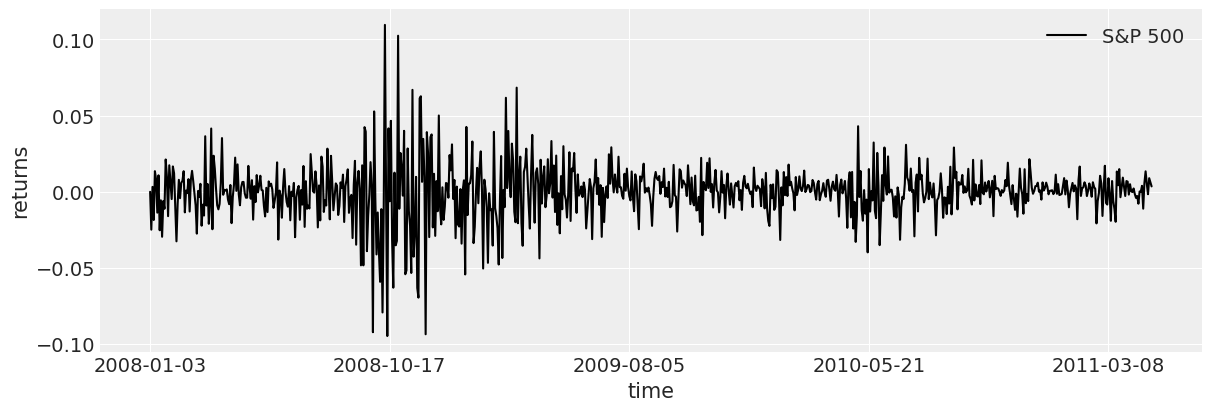

In [29]:
# Figura
fig, ax = plt.subplots(figsize=(12, 4))
r.plot(ax=ax, color='black')
ax.set(xlabel='time', ylabel='returns')
plt.show()

In [30]:
# Modelo SV
'''
Similar to the one described in the No-U-Turn Sampler paper, Hoffman (2011) p21
Retornos diarios (r) con un proceso de log volatilidad latente (s)

log(r_i)  -> t(v, 0, exp(-2 s_i))
s_i       -> Normal (s_i-1, sig^-2)

v         -> Exp(0.1)  -> Grados de libertad
sig       -> Exp(10)
'''

def make_sv_model(df):
    with pm.Model(coords={'time': df.index.values}) as model:
        
        # Priors
        sig = pm.Exponential('sig', 10)
        nu  = pm.Exponential('nu', 0.1)
        
        # Model
        volatility = pm.GaussianRandomWalk('volatility', sigma=sig, dims='time')
        returns    = pm.StudentT(
            'returns',
            nu  = nu,
            lam = np.exp(-2 * volatility),
            observed = df,
            dims='time'
        )
        
    return model

In [31]:
# Instancia
sv_model = make_sv_model(df)
# pm.model_to_graphviz(sv_model)


You can find the C code in this temporary file: C:\Users\MAURICIO\AppData\Local\Temp\theano_compilation_error_tkga5hm7


Exception: ("Compilation failed (return status=1): C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\ccKJtuVD.o: In function `run':\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:99: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:124: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:130: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:158: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:195: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:210: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:479: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\ccKJtuVD.o: In function `_Py_INCREF':\r. c:/Users/MAURICIO/anaconda3/include/object.h:408: undefined reference to `__imp__Py_NoneStruct'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\ccKJtuVD.o: In function `run':\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:485: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:244: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:265: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:173: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:179: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:515: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:514: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:516: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:259: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:279: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:294: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:328: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:349: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:216: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:343: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:300: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:397: undefined reference to `__imp_PyExc_RuntimeError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\ccKJtuVD.o: In function `instantiate':\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:550: undefined reference to `__imp_PyExc_TypeError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\ccKJtuVD.o: In function `_import_array':\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1493: undefined reference to `__imp_PyCapsule_Type'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1494: undefined reference to `__imp_PyExc_RuntimeError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\ccKJtuVD.o: In function `PyInit_m31975b6dadb59d49af3f2b36405378825884299512ee0ed9081be33fa591d30d':\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.9.13-64/tmp1k97y7z3/mod.cpp:583: undefined reference to `__imp_PyExc_ImportError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\ccKJtuVD.o: In function `_import_array':\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1525: undefined reference to `__imp_PyExc_RuntimeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1509: undefined reference to `__imp_PyExc_RuntimeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1515: undefined reference to `__imp_PyExc_RuntimeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1537: undefined reference to `__imp_PyExc_RuntimeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1489: undefined reference to `__imp_PyExc_AttributeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1501: undefined reference to `__imp_PyExc_RuntimeError'\r. collect2.exe: error: ld returned 1 exit status\r. ", 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{10.0}))')

In [8]:
# Priors
with sv_model:
    trace = az.from_pymc3( prior = pm.sample_prior_predictive(500) )
prior_predictive = trace.prior_predictive.stack(pooled_chain=('chain', 'draw'))

NameError: name 'sv_model' is not defined

In [ ]:
# Posterior
smpl = 2_000
burn = 2_000

with sv_model:
    trace.extend(pm.sample( smpl, tune=burn, return_inferencedata=True) )

In [ ]:
posterior = trace.posterior.stack(pooled_chain=('chain', 'draw'))
posterior['exp_volatility'] = np.exp(posterior['volatility'])

In [ ]:
with sv_model:
    trace.extend(az.from_pymc3(posterior_predictive=pymc3.sample_posterior_predictive(trace)))

posterior_predictive = trace.posterior_predictive.stack(pooled_chain=('chain', 'draw'))

In [ ]:
# Resultados
az.plot_trace(trace, var_names=['sig', 'nu'])

In [ ]:
# SV estimada
fig, ax = plt.subplots(figsize=(14, 4))

y_vals = posterior['exp_volatility'].isel(pooled_chain=slice(None, None, 5))
x_vals = y_vals.time.astype(np.datetime64)

plt.plot(x_vals, y_vals, 'k', alpha=0.002)
ax.set_xlim(x_vals.min(), x_vals.max())
ax.set_ylim(bottom=0)
ax.set(title='Estimated volatility over time', xlabel='Date', ylabel='Volatility');

In [ ]:
# Referencias:
# https://www.pymc.io/projects/docs/en/v3/pymc-examples/examples/case_studies/stochastic_volatility.html
# https://pymc3-testing.readthedocs.io/en/rtd-docs/notebooks/stochastic_volatility.html
# https://www.pymc-labs.io/blog-posts/01-xpost-tw-stochastic-volatility/